##Assignment_Linear_Regression


In [93]:
# importing lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
#Loding data
url = 'https://raw.githubusercontent.com/nursnaaz/FutureDataScienceLegends/main/04.%20Linear%20Regression/Notebook/Assignment%20/used_car_prices_dataset_final.csv'
data = pd.read_csv(url, encoding = 'unicode_escape')


##EDA

In [3]:
data.head(5)

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.725266,Honda,Electric,Manual,3.0,1.858776,116.781923,Poor,37380.232721
1,11,72118.008487,Honda,Electric,Automatic,4.0,2.464409,150.064915,Fair,58279.184367
2,8,38721.050239,Ford,Hybrid,Manual,2.0,1.666394,140.577568,Fair,52420.515613
3,7,33675.655109,Kia,Petrol,Automatic,3.0,2.799322,157.020208,Poor,54195.804720
4,19,51562.861259,Mercedes,Petrol,Automatic,4.0,2.423886,196.907490,Fair,57287.511089


In [4]:
data.shape

(4666, 10)

In [5]:
data.columns

Index(['CarAge', 'Mileage', 'Brand', 'FuelType', 'Transmission', 'OwnerCount',
       'EngineSize', 'Horsepower', 'CarCondition', 'ResalePrice'],
      dtype='object')

In [6]:
data.dtypes

,0
CarAge,int64
Mileage,float64
Brand,object
FuelType,object
Transmission,object
OwnerCount,float64
EngineSize,float64
Horsepower,float64
CarCondition,object
ResalePrice,float64


In [7]:
data.info( )


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CarAge        4666 non-null   int64  
 1   Mileage       4666 non-null   float64
 2   Brand         4666 non-null   object 
 3   FuelType      4666 non-null   object 
 4   Transmission  4666 non-null   object 
 5   OwnerCount    4533 non-null   float64
 6   EngineSize    4666 non-null   float64
 7   Horsepower    4666 non-null   float64
 8   CarCondition  4666 non-null   object 
 9   ResalePrice   4666 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 364.7+ KB


In [8]:
data.describe()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
count,4666.000000,4666.000000,4533.000000,4666.000000,4666.000000,4666.000000
mean,10.272396,51426.427843,2.481800,2.038584,149.847050,52181.774725
std,5.941061,24202.419914,1.135924,0.578350,39.985538,12106.945975
min,1.000000,-26733.110969,1.000000,-0.239261,-28.617994,-599.850702
25%,5.000000,36405.518638,1.000000,1.670417,122.888099,44039.237132
50%,10.000000,49959.169302,2.000000,2.020539,149.576750,52222.640637
75%,15.000000,64324.464932,4.000000,2.361428,176.628790,60278.028717
max,30.000000,150000.000000,4.000000,5.000000,291.701613,94400.286774


In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

,0
CarAge,0
Mileage,0
Brand,0
FuelType,0
Transmission,0
OwnerCount,133
EngineSize,0
Horsepower,0
CarCondition,0
ResalePrice,0


<Axes: >

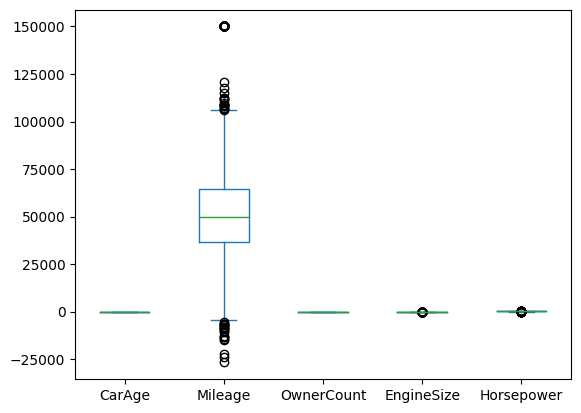

In [11]:
data.drop(columns = 'ResalePrice').plot(kind = 'box')

<Axes: >

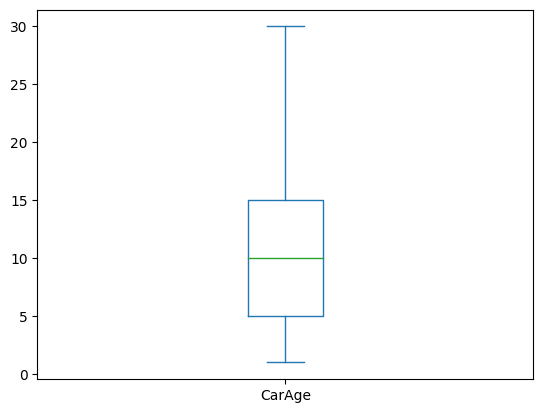

In [12]:
data ['CarAge'].plot(kind = 'box')

In [13]:
num_col = data.select_dtypes(include = 'number').columns

CarAge


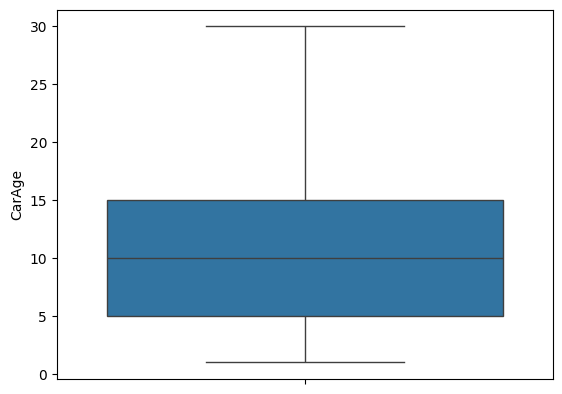

Mileage


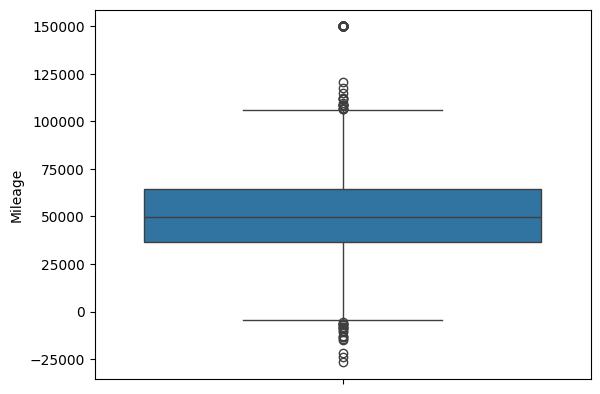

OwnerCount


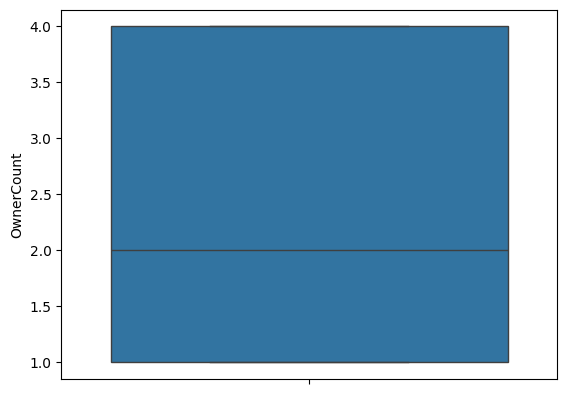

EngineSize


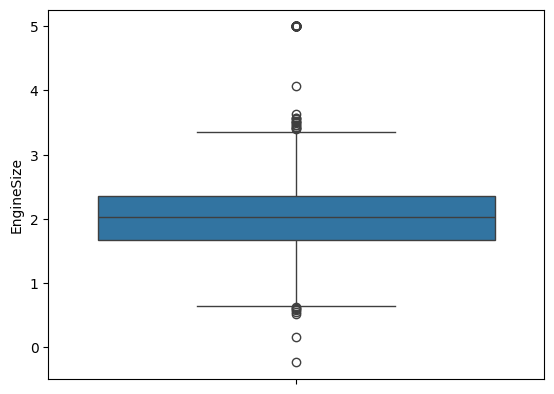

Horsepower


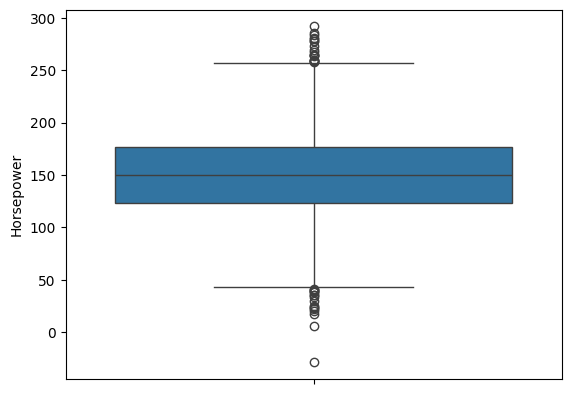

ResalePrice


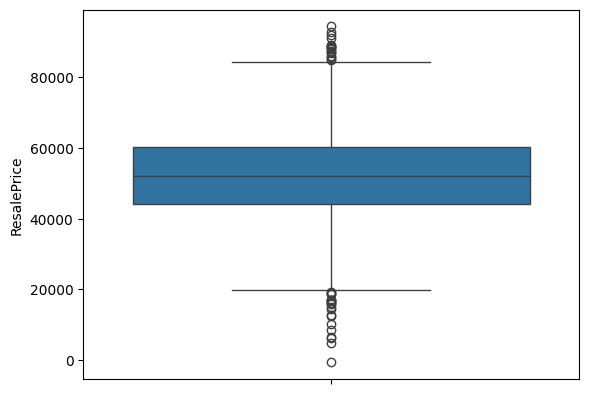

In [14]:
for col in num_col:
  print(col)
  sns.boxplot(data[col ])
  plt.show()

In [15]:
data[num_col].corr()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
CarAge,1.000000,0.061936,0.034821,0.027316,0.009051,-0.477215
Mileage,0.061936,1.000000,0.014765,0.055866,-0.000176,-0.210357
OwnerCount,0.034821,0.014765,1.000000,-0.007302,0.015496,0.008008
EngineSize,0.027316,0.055866,-0.007302,1.000000,-0.011504,0.204210
Horsepower,0.009051,-0.000176,0.015496,-0.011504,1.000000,0.654101
ResalePrice,-0.477215,-0.210357,0.008008,0.204210,0.654101,1.000000


<Axes: >

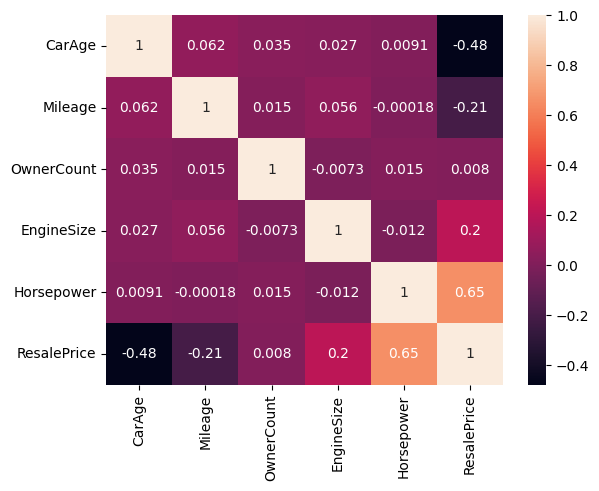

In [16]:
sns.heatmap(data[num_col].corr(),annot =True)

array([[<Axes: title={'center': 'CarAge'}>,
        <Axes: title={'center': 'Mileage'}>],
       [<Axes: title={'center': 'OwnerCount'}>,
        <Axes: title={'center': 'EngineSize'}>],
       [<Axes: title={'center': 'Horsepower'}>,
        <Axes: title={'center': 'ResalePrice'}>]], dtype=object)

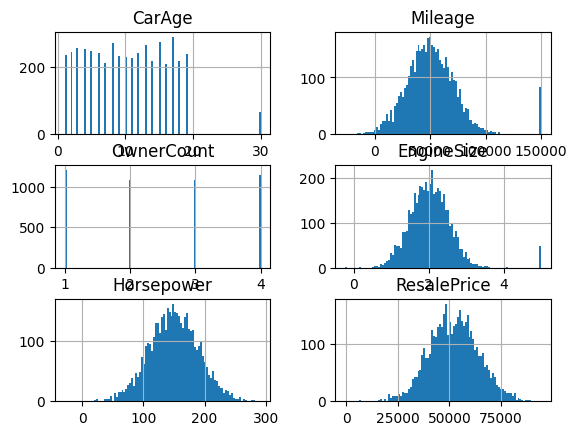

In [17]:
data.hist(bins = 100)

<Axes: >

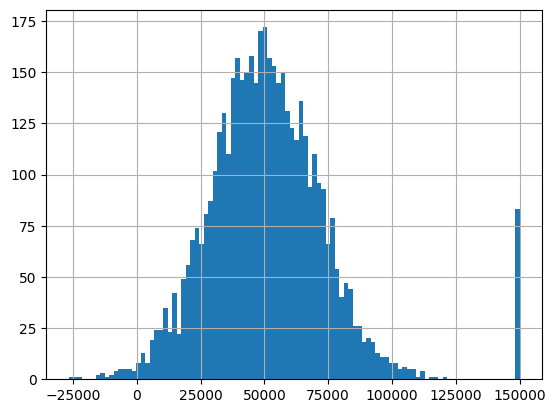

In [18]:
data['Mileage'].hist(bins = 100)

<Axes: >

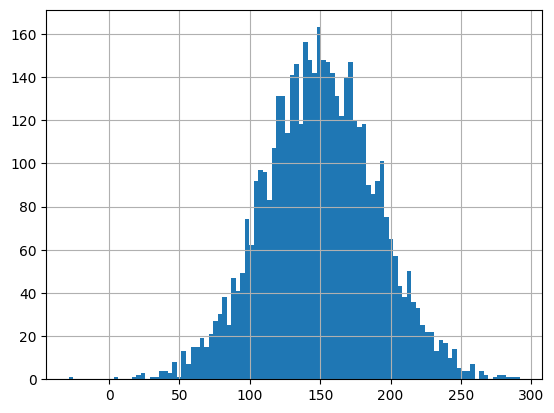

In [19]:
data['Horsepower'].hist(bins = 100)

<Axes: >

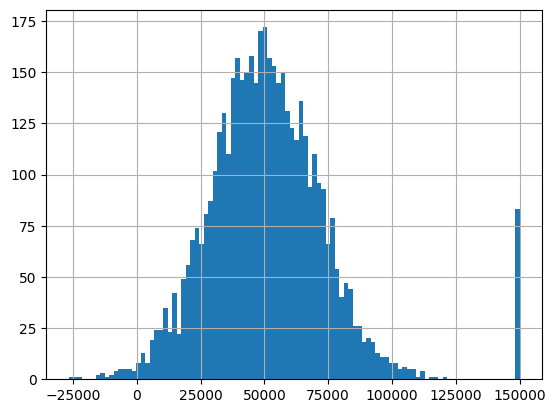

In [20]:
data['Mileage'].hist(bins=100)

<Axes: >

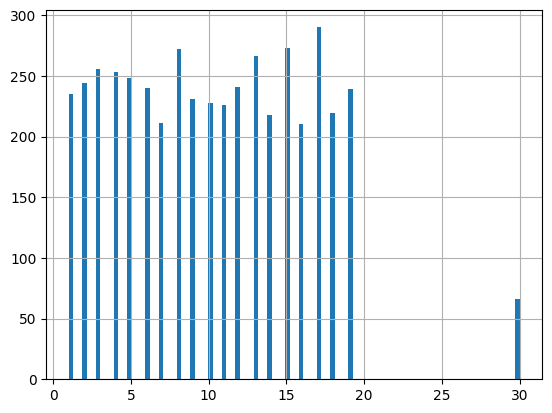

In [21]:
data['CarAge'].hist(bins=100)

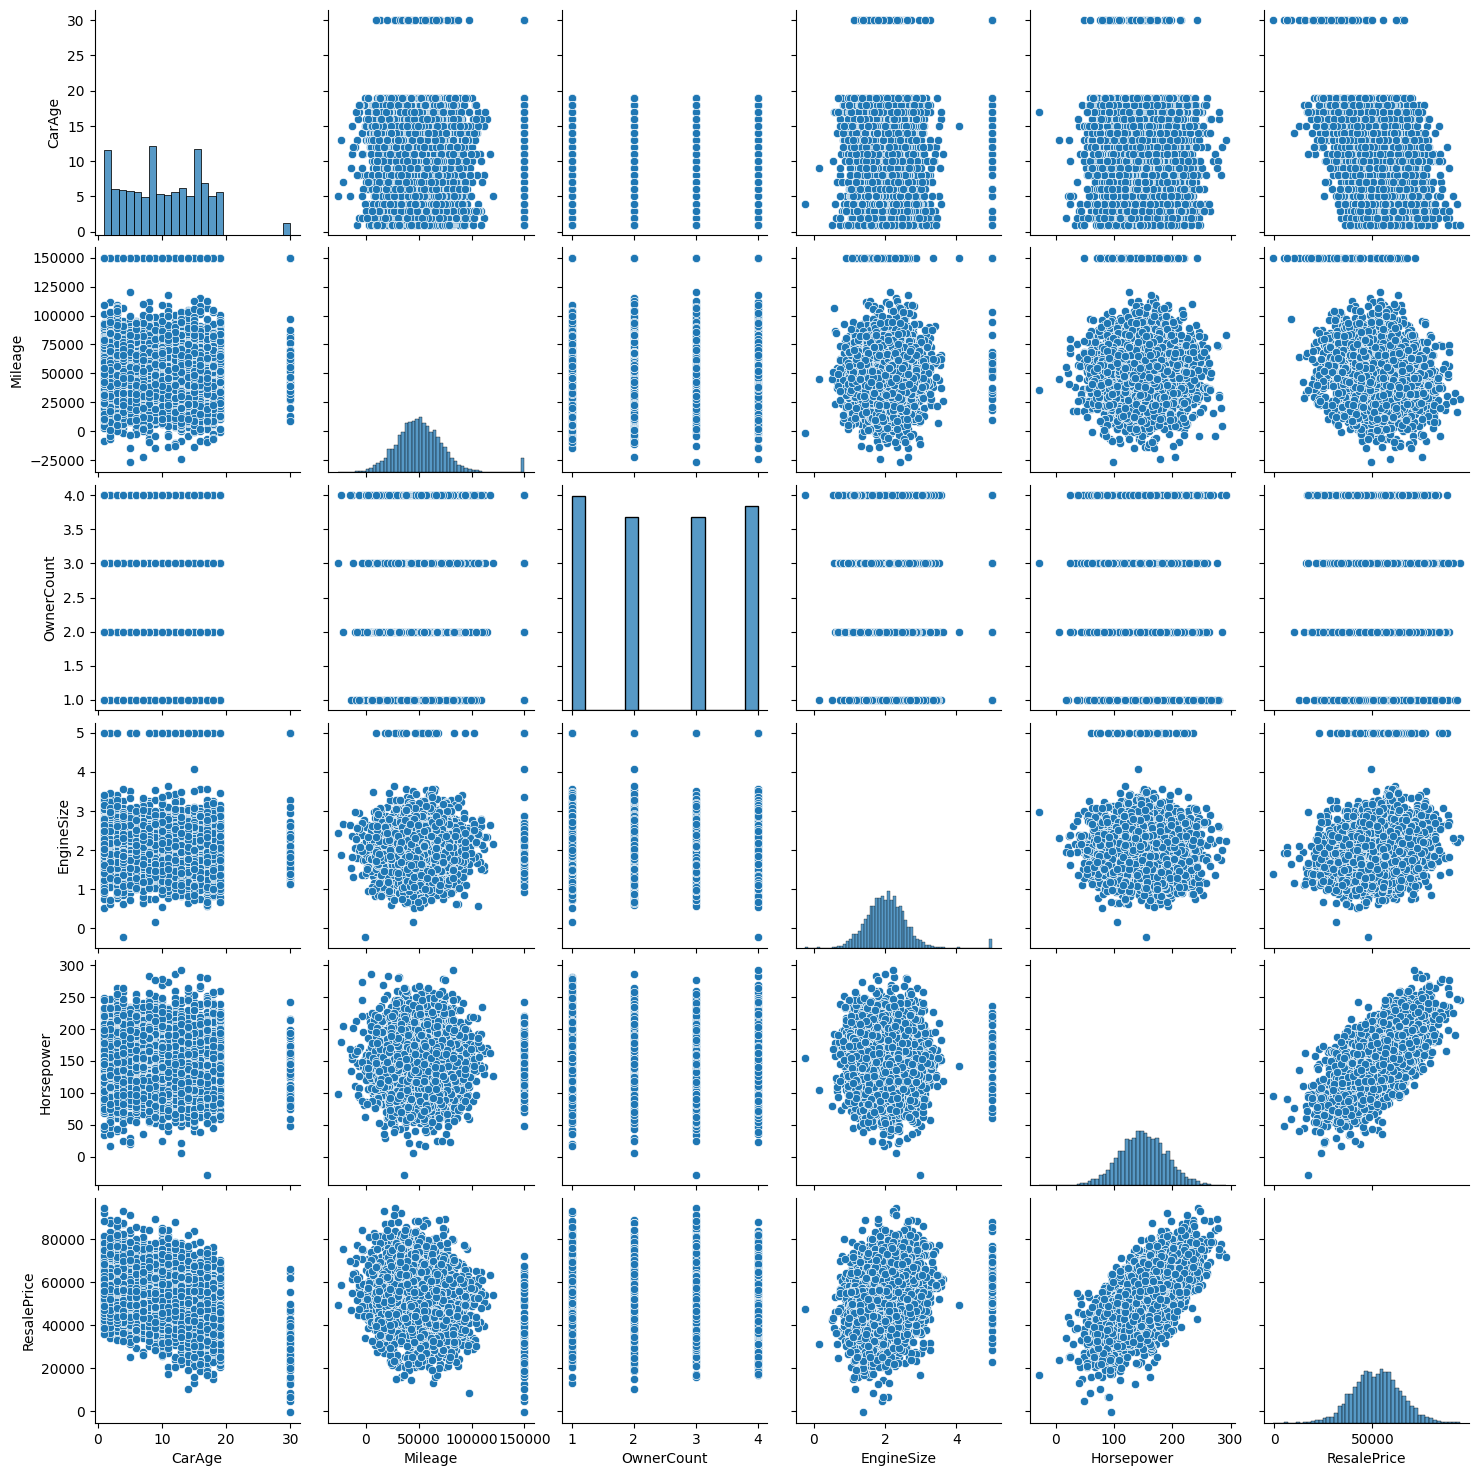

In [22]:
#bivariate
sns.pairplot(data)

<Axes: xlabel='ResalePrice', ylabel='CarAge'>

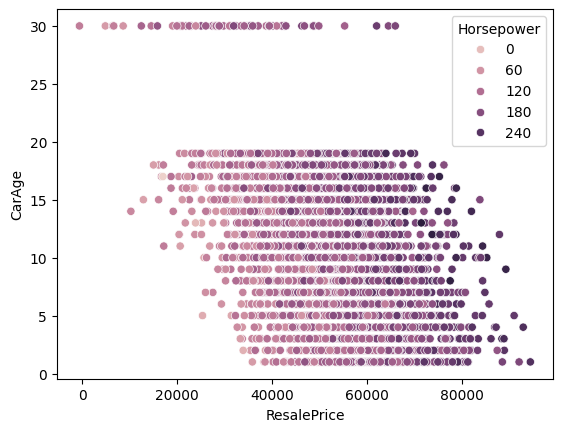

In [23]:
  sns.scatterplot(x=data['ResalePrice'],y=data['CarAge'], hue=data['Horsepower'] )

<Axes: xlabel='ResalePrice', ylabel='EngineSize'>

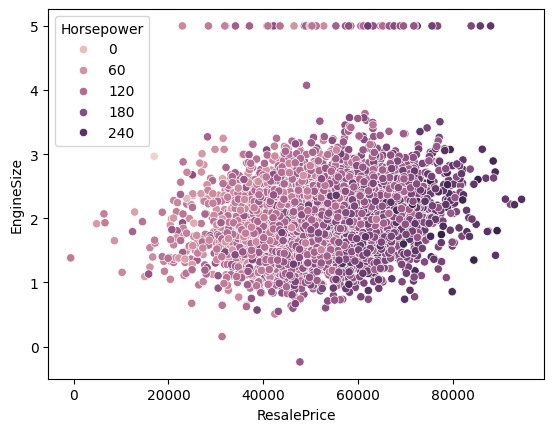

In [24]:
  sns.scatterplot(x=data['ResalePrice'],y=data['EngineSize'], hue=data['Horsepower'] )

<Axes: xlabel='ResalePrice', ylabel='Mileage'>

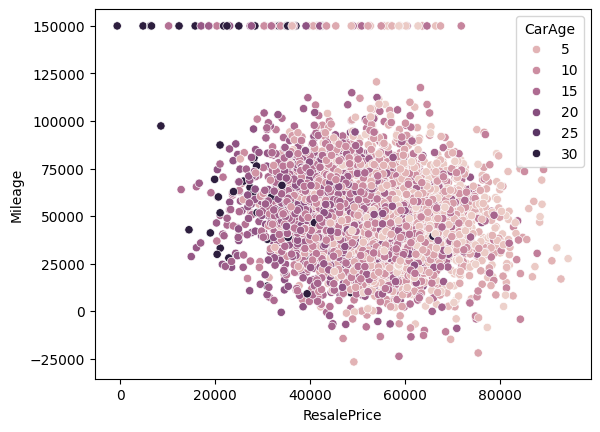

In [25]:
  sns.scatterplot(x=data['ResalePrice'],y=data['Mileage'], hue=data['CarAge'])

##Pre-processing


In [26]:
#pre processing

data.isnull().sum()

,0
CarAge,0
Mileage,0
Brand,0
FuelType,0
Transmission,0
OwnerCount,133
EngineSize,0
Horsepower,0
CarCondition,0
ResalePrice,0


In [27]:
data


,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.725266,Honda,Electric,Manual,3.0,1.858776,116.781923,Poor,37380.232721
1,11,72118.008487,Honda,Electric,Automatic,4.0,2.464409,150.064915,Fair,58279.184367
2,8,38721.050239,Ford,Hybrid,Manual,2.0,1.666394,140.577568,Fair,52420.515613
3,7,33675.655109,Kia,Petrol,Automatic,3.0,2.799322,157.020208,Poor,54195.804720
4,19,51562.861259,Mercedes,Petrol,Automatic,4.0,2.423886,196.907490,Fair,57287.511089
...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.582928,Audi,Hybrid,Manual,2.0,1.839159,170.177585,Fair,56808.958580
4662,4,66193.150603,Hyundai,Diesel,Automatic,4.0,1.838883,162.177454,Poor,56224.633133
4663,1,54614.234981,Ford,Electric,Automatic,2.0,2.478123,178.078306,Excellent,68440.018358
4664,7,52035.766674,Toyota,Hybrid,Manual,4.0,1.629055,191.210803,Excellent,64847.894059


In [28]:
data.shape


(4666, 10)

In [29]:
#finding mode to fill null data
data['OwnerCount'].mode()[0]

1.0

In [30]:
data['OwnerCount'].value_counts()

,count
OwnerCount,
1.0,1207
4.0,1151
3.0,1089
2.0,1086


In [31]:
data['OwnerCount'].fillna(data['OwnerCount'].mode()[0], inplace = True)

In [32]:
data.isnull().sum()

,0
CarAge,0
Mileage,0
Brand,0
FuelType,0
Transmission,0
OwnerCount,0
EngineSize,0
Horsepower,0
CarCondition,0
ResalePrice,0


In [33]:
# Removing horsepower neg., since horespower cannot be in negative
data['Horsepower'][data['Horsepower']<0].value_counts()


,count
Horsepower,
-28.617994,1


In [34]:
data = data[data['Horsepower']>0]

In [35]:
data['Mileage'][data['Mileage']>130000].value_counts()

,count
Mileage,
150000.0,83


In [36]:
data[data['CarAge']<0].value_counts()

,,,,,,,,,,count
CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice,


In [37]:
data[data['CarAge']>20].value_counts().to_csv('result.csv')

In [38]:
data


,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.725266,Honda,Electric,Manual,3.0,1.858776,116.781923,Poor,37380.232721
1,11,72118.008487,Honda,Electric,Automatic,4.0,2.464409,150.064915,Fair,58279.184367
2,8,38721.050239,Ford,Hybrid,Manual,2.0,1.666394,140.577568,Fair,52420.515613
3,7,33675.655109,Kia,Petrol,Automatic,3.0,2.799322,157.020208,Poor,54195.804720
4,19,51562.861259,Mercedes,Petrol,Automatic,4.0,2.423886,196.907490,Fair,57287.511089
...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.582928,Audi,Hybrid,Manual,2.0,1.839159,170.177585,Fair,56808.958580
4662,4,66193.150603,Hyundai,Diesel,Automatic,4.0,1.838883,162.177454,Poor,56224.633133
4663,1,54614.234981,Ford,Electric,Automatic,2.0,2.478123,178.078306,Excellent,68440.018358
4664,7,52035.766674,Toyota,Hybrid,Manual,4.0,1.629055,191.210803,Excellent,64847.894059


In [39]:
data['Horsepower'][data['Horsepower']<0].value_counts()

,count
Horsepower,


In [40]:
data[num_col].describe()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
count,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000,4665.000000
mean,10.270954,51429.766582,2.439443,2.038385,149.885306,52189.319095
std,5.940881,24203.939699,1.146546,0.578252,39.904333,12097.269705
min,1.000000,-26733.110969,1.000000,-0.239261,5.693382,-599.850702
25%,5.000000,36415.386936,1.000000,1.670112,122.922662,44050.941732
50%,10.000000,49965.716927,2.000000,2.020508,149.576975,52226.634337
75%,15.000000,64326.801611,3.000000,2.361145,176.629599,60281.495317
max,30.000000,150000.000000,4.000000,5.000000,291.701613,94400.286774


In [41]:
data['Mileage'][data['Mileage']<0].value_counts().sum()

35

In [42]:
data= data[data['Mileage']>0]

In [43]:
data[num_col].describe()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
count,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000,4630.000000
mean,10.267171,51878.409136,2.440173,2.038002,149.878631,52137.030117
std,5.944848,23729.885103,1.146338,0.578094,39.842366,12083.617867
min,1.000000,38.779650,1.000000,0.155733,5.693382,-599.850702
25%,5.000000,36866.539462,1.000000,1.667638,122.939385,43982.821137
50%,10.000000,50175.720975,2.000000,2.019657,149.576750,52198.439114
75%,15.000000,64477.238088,3.000000,2.360594,176.631464,60216.631322
max,30.000000,150000.000000,4.000000,5.000000,291.701613,94400.286774


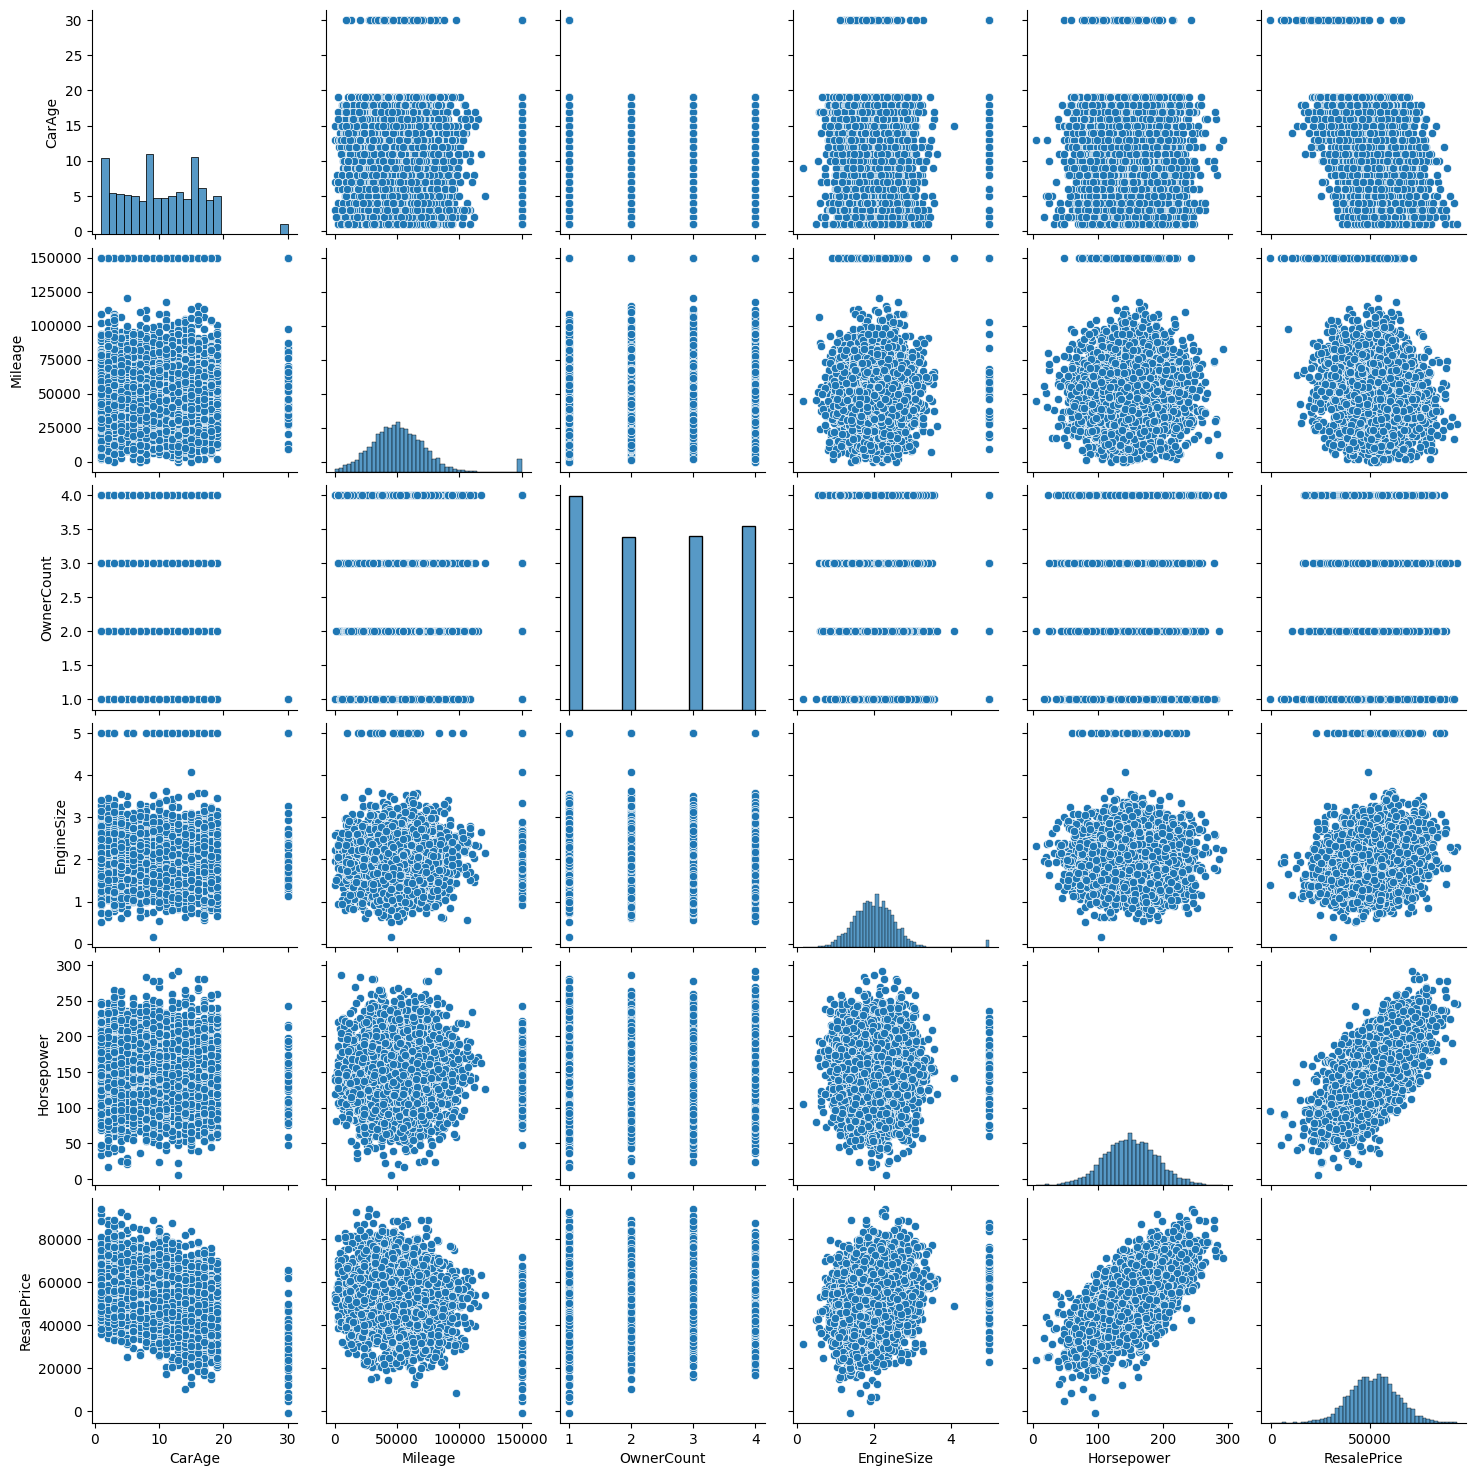

In [44]:
sns.pairplot(data)

In [45]:
data[num_col].corr()

,CarAge,Mileage,OwnerCount,EngineSize,Horsepower,ResalePrice
CarAge,1.000000,0.065179,-0.027404,0.026430,0.010633,-0.478955
Mileage,0.065179,1.000000,-0.005269,0.059839,-0.000092,-0.205872
OwnerCount,-0.027404,-0.005269,1.000000,-0.019547,0.020182,0.039249
EngineSize,0.026430,0.059839,-0.019547,1.000000,-0.009801,0.205337
Horsepower,0.010633,-0.000092,0.020182,-0.009801,1.000000,0.652727
ResalePrice,-0.478955,-0.205872,0.039249,0.205337,0.652727,1.000000


<Axes: >

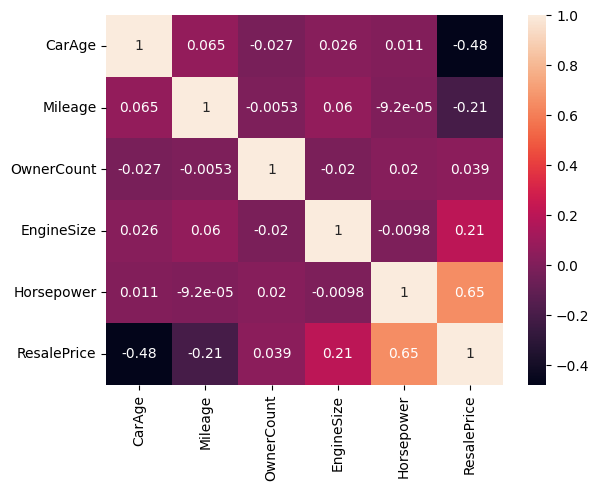

In [46]:
sns.heatmap(data[num_col].corr(), annot = True)

In [47]:
data.head(5)

,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.725266,Honda,Electric,Manual,3.0,1.858776,116.781923,Poor,37380.232721
1,11,72118.008487,Honda,Electric,Automatic,4.0,2.464409,150.064915,Fair,58279.184367
2,8,38721.050239,Ford,Hybrid,Manual,2.0,1.666394,140.577568,Fair,52420.515613
3,7,33675.655109,Kia,Petrol,Automatic,3.0,2.799322,157.020208,Poor,54195.804720
4,19,51562.861259,Mercedes,Petrol,Automatic,4.0,2.423886,196.907490,Fair,57287.511089


In [48]:
# Encoding data using labling
data['CarCondition'].value_counts()

,count
CarCondition,
Fair,1179
Excellent,1177
Poor,1143
Good,1131


In [49]:
mapping = {'Excellent':4, 'Good':3,'Fair':2, 'Poor':1}
data['CarCondition'] = data['CarCondition'].map(mapping)

<ipython-input-49-bb664ff2ec38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CarCondition'] = data['CarCondition'].map(mapping)


In [50]:
data


,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.725266,Honda,Electric,Manual,3.0,1.858776,116.781923,1,37380.232721
1,11,72118.008487,Honda,Electric,Automatic,4.0,2.464409,150.064915,2,58279.184367
2,8,38721.050239,Ford,Hybrid,Manual,2.0,1.666394,140.577568,2,52420.515613
3,7,33675.655109,Kia,Petrol,Automatic,3.0,2.799322,157.020208,1,54195.804720
4,19,51562.861259,Mercedes,Petrol,Automatic,4.0,2.423886,196.907490,2,57287.511089
...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.582928,Audi,Hybrid,Manual,2.0,1.839159,170.177585,2,56808.958580
4662,4,66193.150603,Hyundai,Diesel,Automatic,4.0,1.838883,162.177454,1,56224.633133
4663,1,54614.234981,Ford,Electric,Automatic,2.0,2.478123,178.078306,4,68440.018358
4664,7,52035.766674,Toyota,Hybrid,Manual,4.0,1.629055,191.210803,4,64847.894059


In [51]:
#Encoding data using one-hot encoding
data['Transmission'].value_counts()

,count
Transmission,
Manual,2345
Automatic,2285


In [52]:
mapping_1 = {'Manual':0, 'Automatic':1}
data['Transmission'] = data['Transmission'].map(mapping_1)

<ipython-input-52-a5aff94de8d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Transmission'] = data['Transmission'].map(mapping_1)


In [53]:
data.head()


,CarAge,Mileage,Brand,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice
0,15,70539.725266,Honda,Electric,0,3.0,1.858776,116.781923,1,37380.232721
1,11,72118.008487,Honda,Electric,1,4.0,2.464409,150.064915,2,58279.184367
2,8,38721.050239,Ford,Hybrid,0,2.0,1.666394,140.577568,2,52420.515613
3,7,33675.655109,Kia,Petrol,1,3.0,2.799322,157.020208,1,54195.804720
4,19,51562.861259,Mercedes,Petrol,1,4.0,2.423886,196.907490,2,57287.511089


In [54]:
data = pd.get_dummies(data, columns=['Brand'])

In [55]:
data.replace({True:1, False:0})

,CarAge,Mileage,FuelType,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Nissan,Brand_Toyota
0,15,70539.725266,Electric,0,3.0,1.858776,116.781923,1,37380.232721,0,0,0,1,0,0,0,0,0
1,11,72118.008487,Electric,1,4.0,2.464409,150.064915,2,58279.184367,0,0,0,1,0,0,0,0,0
2,8,38721.050239,Hybrid,0,2.0,1.666394,140.577568,2,52420.515613,0,0,1,0,0,0,0,0,0
3,7,33675.655109,Petrol,1,3.0,2.799322,157.020208,1,54195.804720,0,0,0,0,0,1,0,0,0
4,19,51562.861259,Petrol,1,4.0,2.423886,196.907490,2,57287.511089,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.582928,Hybrid,0,2.0,1.839159,170.177585,2,56808.958580,1,0,0,0,0,0,0,0,0
4662,4,66193.150603,Diesel,1,4.0,1.838883,162.177454,1,56224.633133,0,0,0,0,1,0,0,0,0
4663,1,54614.234981,Electric,1,2.0,2.478123,178.078306,4,68440.018358,0,0,1,0,0,0,0,0,0
4664,7,52035.766674,Hybrid,0,4.0,1.629055,191.210803,4,64847.894059,0,0,0,0,0,0,0,0,1


In [56]:
data = pd.get_dummies(data, columns=['FuelType'])

In [57]:
data.replace({True:1, False:0})

,CarAge,Mileage,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice,Brand_Audi,Brand_BMW,...,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Nissan,Brand_Toyota,FuelType_Diesel,FuelType_Electric,FuelType_Hybrid,FuelType_Petrol
0,15,70539.725266,0,3.0,1.858776,116.781923,1,37380.232721,0,0,...,1,0,0,0,0,0,0,1,0,0
1,11,72118.008487,1,4.0,2.464409,150.064915,2,58279.184367,0,0,...,1,0,0,0,0,0,0,1,0,0
2,8,38721.050239,0,2.0,1.666394,140.577568,2,52420.515613,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,33675.655109,1,3.0,2.799322,157.020208,1,54195.804720,0,0,...,0,0,1,0,0,0,0,0,0,1
4,19,51562.861259,1,4.0,2.423886,196.907490,2,57287.511089,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,4,22710.582928,0,2.0,1.839159,170.177585,2,56808.958580,1,0,...,0,0,0,0,0,0,0,0,1,0
4662,4,66193.150603,1,4.0,1.838883,162.177454,1,56224.633133,0,0,...,0,1,0,0,0,0,1,0,0,0
4663,1,54614.234981,1,2.0,2.478123,178.078306,4,68440.018358,0,0,...,0,0,0,0,0,0,0,1,0,0
4664,7,52035.766674,0,4.0,1.629055,191.210803,4,64847.894059,0,0,...,0,0,0,0,0,1,0,0,1,0


##Scaling

In [58]:
#Scaling - standard
scaler = StandardScaler()

In [59]:
X = data.drop(columns = 'ResalePrice')

In [60]:
X.columns

Index(['CarAge', 'Mileage', 'Transmission', 'OwnerCount', 'EngineSize',
       'Horsepower', 'CarCondition', 'Brand_Audi', 'Brand_BMW', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_Kia', 'Brand_Mercedes',
       'Brand_Nissan', 'Brand_Toyota', 'FuelType_Diesel', 'FuelType_Electric',
       'FuelType_Hybrid', 'FuelType_Petrol'],
      dtype='object')

In [61]:
scaled_data = X.columns

In [62]:
data[scaled_data] = scaler.fit_transform(data[scaled_data])

In [63]:
data

,CarAge,Mileage,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice,Brand_Audi,Brand_BMW,...,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Nissan,Brand_Toyota,FuelType_Diesel,FuelType_Electric,FuelType_Hybrid,FuelType_Petrol
0,0.796209,0.786491,-0.987124,0.488414,-0.310064,-0.830781,-1.345713,37380.232721,-0.352995,-0.356852,...,2.870804,-0.355697,-0.354541,-0.353382,-0.341671,-0.356468,-0.595477,1.747653,-0.578182,-0.563548
1,0.123285,0.853008,1.013044,1.360851,0.737687,0.004676,-0.452045,58279.184367,-0.352995,-0.356852,...,2.870804,-0.355697,-0.354541,-0.353382,-0.341671,-0.356468,-0.595477,1.747653,-0.578182,-0.563548
2,-0.381408,-0.554524,-0.987124,-0.384023,-0.642886,-0.233472,-0.452045,52420.515613,-0.352995,-0.356852,...,-0.348334,-0.355697,-0.354541,-0.353382,-0.341671,-0.356468,-0.595477,-0.572196,1.729560,-0.563548
3,-0.549640,-0.767164,1.013044,0.488414,1.317090,0.179265,-1.345713,54195.804720,-0.352995,-0.356852,...,-0.348334,-0.355697,2.820552,-0.353382,-0.341671,-0.356468,-0.595477,-0.572196,-0.578182,1.774470
4,1.469133,-0.013299,1.013044,1.360851,0.667582,1.180501,-0.452045,57287.511089,-0.352995,-0.356852,...,-0.348334,-0.355697,-0.354541,2.829802,-0.341671,-0.356468,-0.595477,-0.572196,-0.578182,1.774470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4661,-1.054333,-1.229293,-0.987124,-0.384023,-0.344001,0.509537,-0.452045,56808.958580,2.832903,-0.356852,...,-0.348334,-0.355697,-0.354541,-0.353382,-0.341671,-0.356468,-0.595477,-0.572196,1.729560,-0.563548
4662,-1.054333,0.603302,1.013044,1.360851,-0.344478,0.308720,-1.345713,56224.633133,-0.352995,-0.356852,...,-0.348334,2.811378,-0.354541,-0.353382,-0.341671,-0.356468,1.679325,-0.572196,-0.578182,-0.563548
4663,-1.559026,0.115303,1.013044,-0.384023,0.761413,0.707858,1.335290,68440.018358,-0.352995,-0.356852,...,-0.348334,-0.355697,-0.354541,-0.353382,-0.341671,-0.356468,-0.595477,1.747653,-0.578182,-0.563548
4664,-0.549640,0.006632,-0.987124,1.360851,-0.707483,1.037505,1.335290,64847.894059,-0.352995,-0.356852,...,-0.348334,-0.355697,-0.354541,-0.353382,-0.341671,2.805304,-0.595477,-0.572196,1.729560,-0.563548


In [64]:
data.corr()

,CarAge,Mileage,Transmission,OwnerCount,EngineSize,Horsepower,CarCondition,ResalePrice,Brand_Audi,Brand_BMW,...,Brand_Honda,Brand_Hyundai,Brand_Kia,Brand_Mercedes,Brand_Nissan,Brand_Toyota,FuelType_Diesel,FuelType_Electric,FuelType_Hybrid,FuelType_Petrol
CarAge,1.000000,0.065179,0.006651,-0.027404,0.026430,0.010633,0.031474,-0.478955,-0.010888,-0.019712,...,0.024697,0.005877,-0.013743,-0.015999,0.007682,0.014537,0.000842,-0.018469,0.008560,0.009076
Mileage,0.065179,1.000000,-0.002131,-0.005269,0.059839,-0.000092,0.009510,-0.205872,-0.012561,-0.004835,...,0.019025,0.000815,-0.004660,0.002737,-0.012206,0.004467,-0.016655,0.016708,-0.011262,0.011689
Transmission,0.006651,-0.002131,1.000000,0.009500,0.009353,-0.005755,0.008561,0.007426,-0.004371,0.010766,...,-0.004525,0.007346,0.005281,-0.000921,-0.002632,-0.010405,-0.006041,-0.004610,-0.001479,0.012354
OwnerCount,-0.027404,-0.005269,0.009500,1.000000,-0.019547,0.020182,0.024268,0.039249,0.007319,0.002256,...,0.009386,0.001856,-0.019486,0.008848,0.004900,-0.008204,-0.017356,0.002327,0.007566,0.007827
EngineSize,0.026430,0.059839,0.009353,-0.019547,1.000000,-0.009801,0.017658,0.205337,0.016222,-0.005844,...,-0.021920,0.000271,0.014664,0.010347,0.013341,-0.012378,0.003025,0.009330,0.001695,-0.014229
Horsepower,0.010633,-0.000092,-0.005755,0.020182,-0.009801,1.000000,0.007044,0.652727,0.011299,0.011875,...,0.009494,0.003930,0.001558,-0.017313,-0.017840,-0.008851,-0.005138,-0.005283,-0.003812,0.014467
CarCondition,0.031474,0.009510,0.008561,0.024268,0.017658,0.007044,1.000000,0.122614,0.023680,-0.019238,...,0.021485,-0.001242,-0.000928,0.000616,-0.008089,-0.003078,-0.018032,0.016720,-0.015485,0.017371
ResalePrice,-0.478955,-0.205872,0.007426,0.039249,0.205337,0.652727,0.122614,1.000000,0.020474,0.017102,...,-0.015106,-0.008608,0.021826,-0.008816,-0.003431,-0.024392,0.008142,0.002169,-0.007551,-0.002904
Brand_Audi,-0.010888,-0.012561,-0.004371,0.007319,0.016222,0.011299,0.023680,0.020474,1.000000,-0.125967,...,-0.122960,-0.125559,-0.125151,-0.124742,-0.120608,-0.125831,-0.017670,-0.010428,0.026158,0.002169
Brand_BMW,-0.019712,-0.004835,0.010766,0.002256,-0.005844,0.011875,-0.019238,0.017102,-0.125967,1.000000,...,-0.124304,-0.126931,-0.126519,-0.126105,-0.121926,-0.127206,-0.010719,0.018996,-0.007924,-0.000099


##Data Split

In [65]:
#data Split

X = data.drop(columns ='ResalePrice')
y = data['ResalePrice']

In [66]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 47)

##Modeling

In [67]:
#Modeling
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

<Axes: >

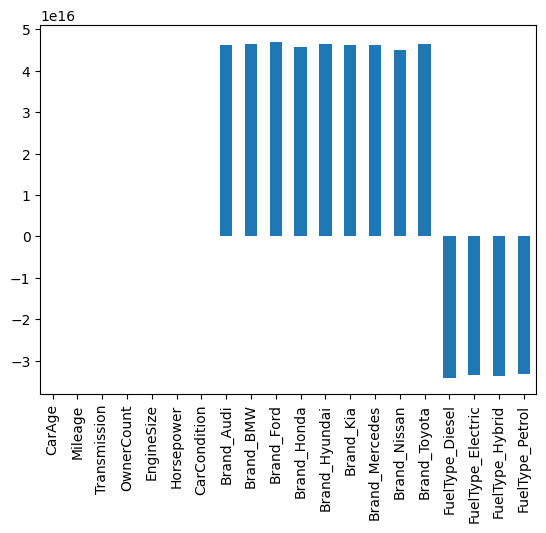

In [68]:
pd.Series(model.coef_, index = X.columns).plot(kind = 'bar')

In [69]:
model.intercept_

52128.38891764527

##Prediction

In [70]:
#data prediction
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)


In [71]:
from ast import Return
#evaluate
def evaluate (actual, pred, source):
  print(source)
  print('MSE  ',mean_squared_error(actual, pred))
  print('RMSE  ',(np.sqrt(mean_squared_error(actual, pred))) )
  print('MAPE  ', mean_absolute_percentage_error(actual, pred))
  return [(mean_squared_error(actual, pred)),(np.sqrt(mean_squared_error(actual, pred))), mean_absolute_percentage_error(actual, pred) ]


In [72]:
train_result =evaluate(train_y, train_pred, 'Train data Result')
test_result = evaluate(test_y, test_pred, 'Test data Result')


Train data Result
MSE   34264304.769055404
RMSE   5853.571966676023
MAPE   0.09604300364858187
Test data Result
MSE   34241158.74399431
RMSE   5851.594547129382
MAPE   0.10501309037413516


In [73]:
train_result

[34264304.769055404, 5853.571966676023, 0.09604300364858187]

In [74]:
test_result

[34241158.74399431, 5851.594547129382, 0.10501309037413516]

In [75]:
Result = train_result + test_result
Result_reshaped = np.array(Result).reshape((2, 3))
pd.DataFrame(Result_reshaped, columns=['MSE', 'RMSE', 'MAPE'], index=['Train', 'Test'])

,MSE,RMSE,MAPE
Train,3.426430e+07,5853.571967,0.096043
Test,3.424116e+07,5851.594547,0.105013


In [76]:
X.shape

(4630, 20)

##Feature Selection

In [77]:
#feature Selection
selector = SelectKBest(score_func=f_regression, k=5)
selector.fit(train_X, train_y)

SelectKBest(k=5, score_func=<function f_regression at 0x79360b3f4ee0>)

In [78]:
selector.get_support()

array([ True,  True, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [79]:
Feature_Selection = X.columns[selector.get_support()]

In [80]:
X = X[Feature_Selection]

In [81]:
#data Split

X = X[Feature_Selection]
y = data['ResalePrice']

In [82]:
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 47)

In [83]:
#Modeling
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

<Axes: >

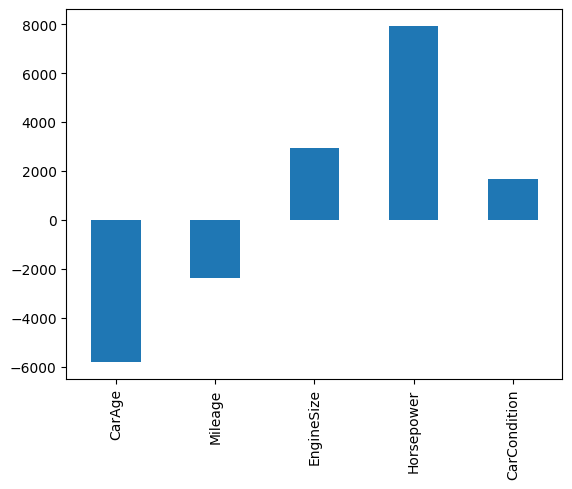

In [84]:
pd.Series(model.coef_, index = X.columns).plot(kind = 'bar')

In [85]:
model.intercept_

52121.60045946601

In [86]:
#data prediction
train_pred = model.predict(train_X)
test_pred = model.predict(test_X)


In [103]:
from ast import Return
#evaluate
def evaluate (actual, pred, source):
  print(source)
  print('MSE  ',mean_squared_error(actual, pred))
  print('RMSE  ',(np.sqrt(mean_squared_error(actual, pred))) )
  print('MAPE  ', mean_absolute_percentage_error(actual, pred))
  print('R2  ', r2_score(actual, pred))
  return [(mean_squared_error(actual, pred)),(np.sqrt(mean_squared_error(actual, pred))), (mean_absolute_percentage_error(actual, pred)),(r2_score(actual, pred)) ]


In [104]:
train_result =evaluate(train_y, train_pred, 'Train data Result')
test_result = evaluate(test_y, test_pred, 'Test data Result')


Train data Result
MSE   34398325.28337361
RMSE   5865.008549300982
MAPE   0.09630776250987139
R2   0.7677582152508716
Test data Result
MSE   34145084.78617509
RMSE   5843.379568894621
MAPE   0.10570321782190296
R2   0.7577284875349913


In [105]:
train_result

[34398325.28337361, 5865.008549300982, 0.09630776250987139, 0.7677582152508716]

In [106]:
test_result

[34145084.78617509, 5843.379568894621, 0.10570321782190296, 0.7577284875349913]

In [109]:
Result = train_result + test_result
Result_reshaped = np.array(Result).reshape((2, 4))
pd.DataFrame(Result_reshaped, columns=['MSE', 'RMSE', 'MAPE','R2_Score'], index=['Train', 'Test'])

,MSE,RMSE,MAPE,R2_Score
Train,3.439833e+07,5865.008549,0.096308,0.767758
Test,3.414508e+07,5843.379569,0.105703,0.757728
